<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [14]:
# Load the dataset from the given URL
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
# using the previously cleaned up data file
file_url = "df_str_replaced.csv"
df = pd.read_csv(file_url, index_col=0)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

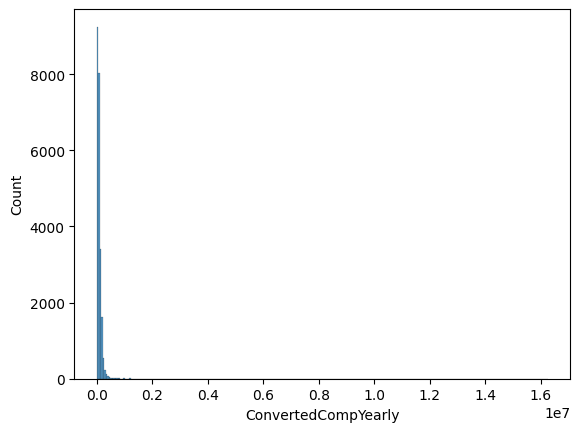

In [3]:
## Write your code here
sns.histplot(df['ConvertedCompYearly'])

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [8]:
## Write your code here
# one-hot encode Employment
df_encoded = df['Employment'].str.get_dummies(sep=';')
# take column header for full-time employees
tag = df_encoded.columns[0]
# create new dataframe then get stats on non-null compensation for full-time employees
df2 = pd.concat([df_encoded[tag], df[['ConvertedCompYearly']]], axis=1)
#stats = df2[~df2['ConvertedCompYearly'].isna() & df2[tag] == 1].describe()
# no need to weed out NAs because they're automatically ignored by stat functions
stats = df2[df2[tag] == 1].describe()
print('Median full-time employee compensation:',
      stats.loc['50%', 'ConvertedCompYearly'])
stats

Median full-time employee compensation: 67666.0


,"Employed, full-time",ConvertedCompYearly
count,45162.0,2.037400e+04
mean,1.0,8.741243e+04
std,0.0,1.598245e+05
min,1.0,1.000000e+00
25%,1.0,3.600000e+04
50%,1.0,6.766600e+04
75%,1.0,1.100000e+05
max,1.0,1.381802e+07


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


In [34]:
c_list = [
    'USA',
    #'Germany',
    'India',
    #'UK',
    #'France',
    'Canada',
    #'Ukraine',
    #'Poland',
    #'Netherlands',
    #'Italy',
    #'Brazil',
    #'Australia',
    #'Spain',
    #'Sweden',
    #'Switzerland',
    #'Austria',
    #'Russia',
    #'Czech Republic',
    #'Belgium',
    #'Israel',
    #'Turkey',
    #'Denmark',
    #'Portugal',
    #'Romania',
    #'Pakistan',
    #'Mexico',
    #'Norway',
    #'Indonesia',
    #'Iran',
    'China',
    #'Hungary',
    #'New Zealand',
    #'Greece',
    #'Finland',
    #'South Africa',
    #'Argentina',
    #'Bangladesh',
    #'Bulgaria',
    #'Nigeria',
    #'Viet Nam',
    #'Japan',
    #'Ireland',
    #'South Korea',
    #'Taiwan',
    #'Egypt',
    #'Slovakia',
    #'Serbia',
    #'Colombia',
    #'Philippines',
    #'Croatia',
    #'Lithuania',
    #'Kenya',
    'HK',
    #'Singapore',
    #'Sri Lanka',
    #'Malaysia',
    #'Thailand',
    #'Sovenia',
    #'Nepal',
    #'Chile',
    #'United Arab Emirates',
    #'Latvia',
    #'Estonia',
]
def comp_boxplots(df):
    total = len(c_list)
    fig, axes = plt.subplots(nrows=1, ncols=total, figsize=(15, 10))
    for idx, name in zip(list(range(total)), c_list):
        sns.boxplot(data=df[df['Country'] == name]['ConvertedCompYearly'], ax=axes[idx])
        axes[idx].set_title(name)
    plt.show()

Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



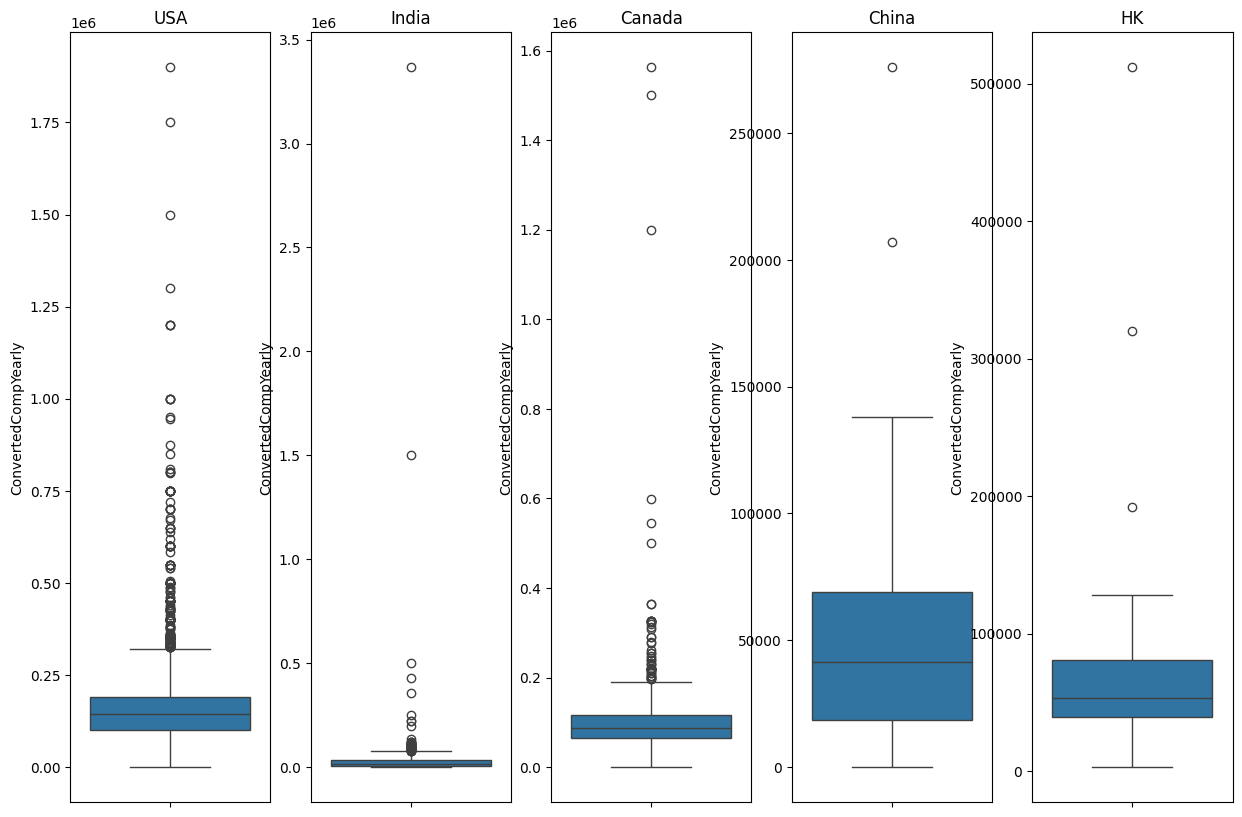

In [35]:
## Write your code here
comp_boxplots(df)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [31]:
## Write your code here
df['ConvertedCompYearly'].describe()
stats = df['ConvertedCompYearly'].describe()
print('Stats of ConvertedCompYearly:', stats)

# 3σ threshold
threshold = stats['mean']+stats['std']*3
print('μ + 3σ:', threshold)

# Q3+1.5IQR threshold
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(f'IQR = Q3 - Q1 = {Q3} - {Q1} = {IQR}')
print('Q1 - 1.5 IQR =', lower_bound)
print('Q3 + 1.5 IQR =', upper_bound)

Stats of ConvertedCompYearly: count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
μ + 3σ: 646426.2065215341
IQR = Q3 - Q1 = 107971.5 - 32712.0 = 75259.5
Q1 - 1.5 IQR = -80177.25
Q3 + 1.5 IQR = 220860.75


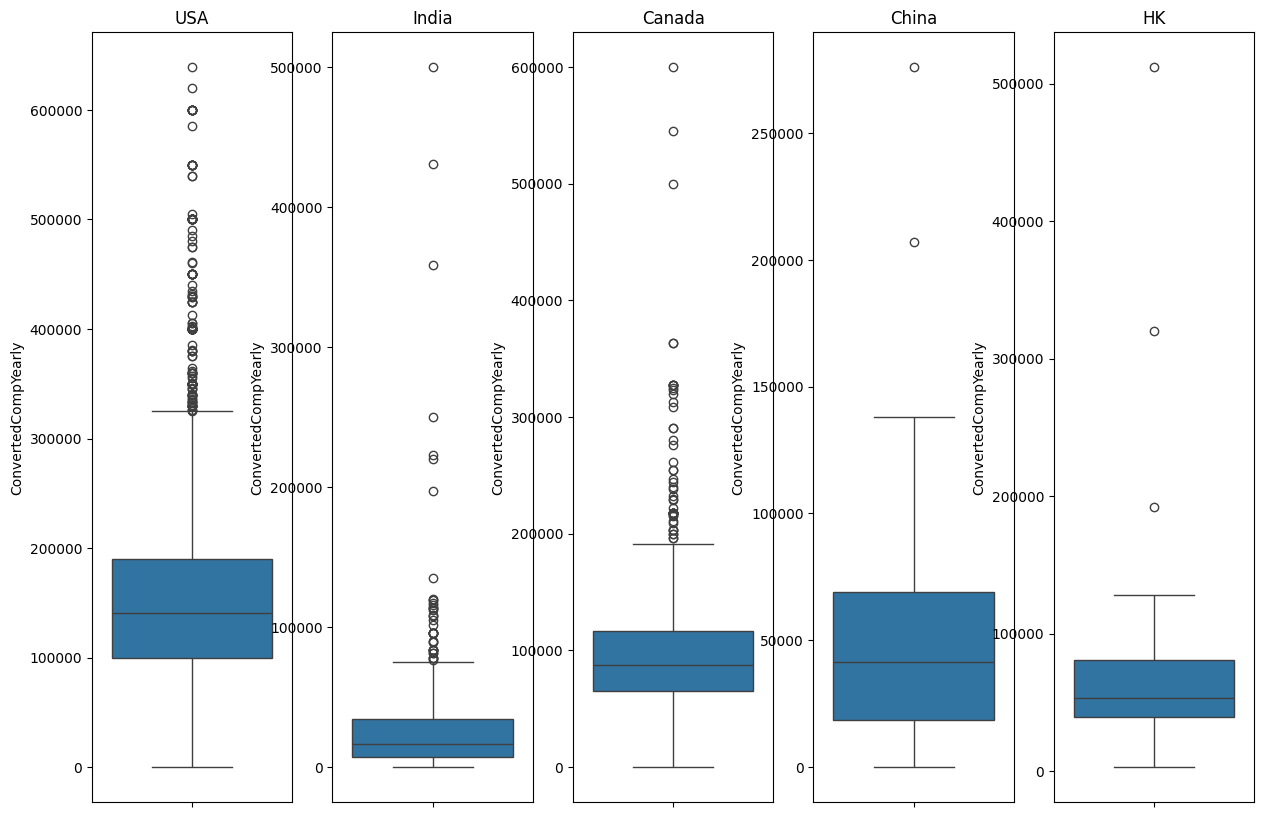

In [36]:
# exclude outliers above 3 sigmas, do box plots
df3 = df[df['ConvertedCompYearly'] <= threshold]
comp_boxplots(df3)

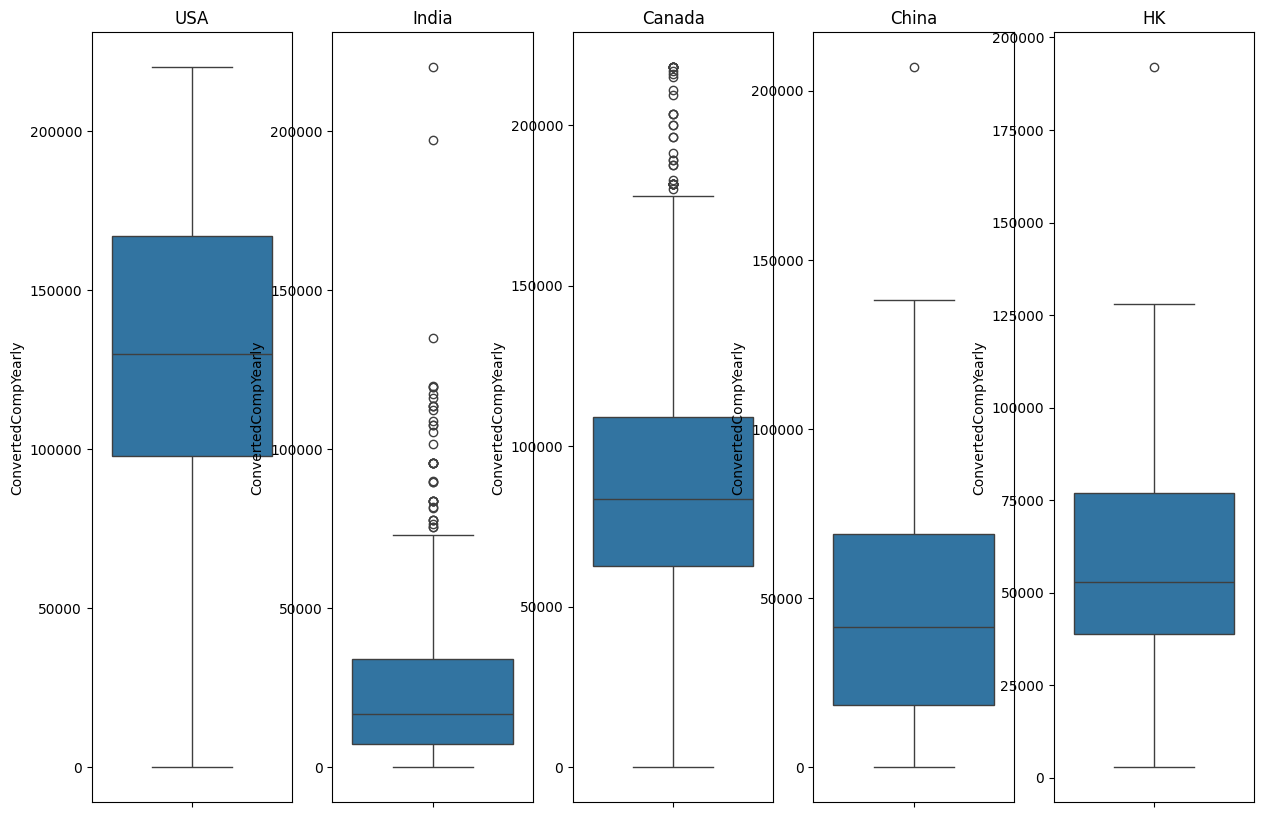

In [38]:
# exclude outliers above Q3+1.5IQR, do box plots
df4 = df[df['ConvertedCompYearly'] <= upper_bound]
comp_boxplots(df4)

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1    JobSat
ConvertedCompYearly             1.000000  0.405657       -0.061020  0.073686
WorkExp                         0.405657  1.000000       -0.034989  0.092346
JobSatPoints_1                 -0.061020 -0.034989        1.000000  0.090941
JobSat                          0.073686  0.092346        0.090941  1.000000


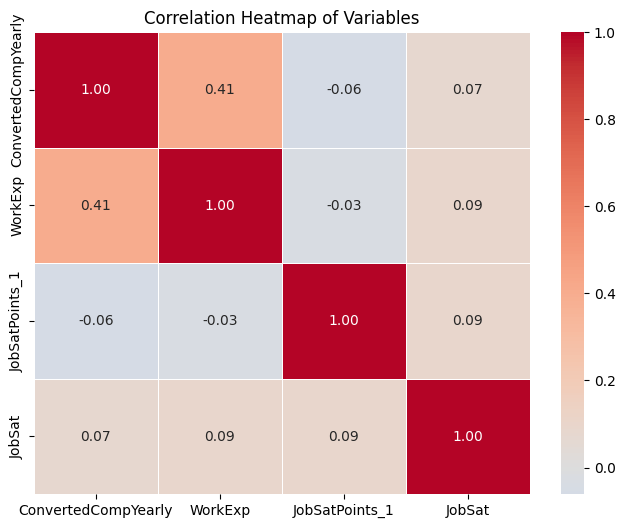

In [65]:
## Write your code here
df5 = df4[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1', 'JobSat']].dropna()

corr_matrix = df5.corr()
print("Correlation Matrix:")
print(corr_matrix)

# 3. Plot the heatmap
plt.figure(figsize=(8, 6)) # Optional: Adjust the figure size
sns.heatmap(
    corr_matrix,
    annot=True,     # Annotate each cell with the correlation value
    cmap='coolwarm',# Choose a color map (e.g., 'coolwarm', 'viridis', 'crest')
    fmt=".2f",      # Format the annotations to two decimal places
    center=0,       # Ensure the color scale is centered at 0 (no correlation)
    linewidths=.5   # Add lines between cells
)

# Add title and display the plot
plt.title('Correlation Heatmap of Variables')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


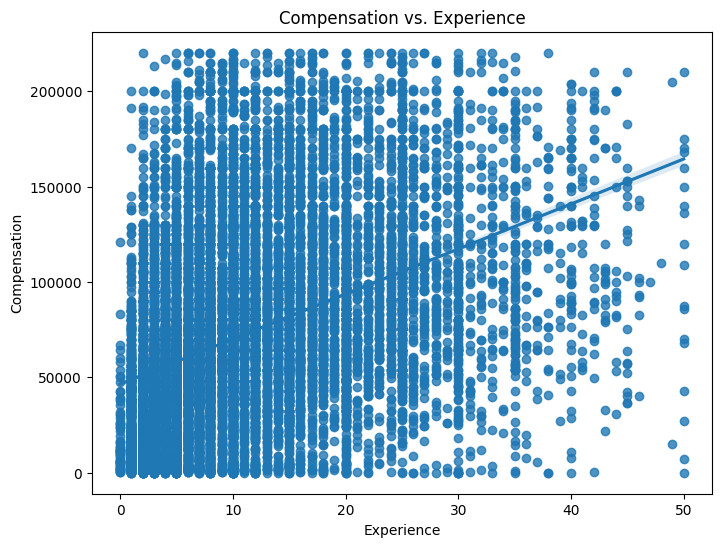

In [67]:
## Write your code here
plt.figure(figsize=(8, 6)) # Optional: adjust figure size
#sns.scatterplot(y='ConvertedCompYearly', x='WorkExp', hue='JobSatPoints_1', data=df5)
#sns.scatterplot(y='ConvertedCompYearly', x='WorkExp', hue='JobSat', data=df5)
sns.regplot(y='ConvertedCompYearly', x='WorkExp', data=df5)
plt.title('Compensation vs. Experience')
plt.ylabel('Compensation')
plt.xlabel('Experience')
plt.show()

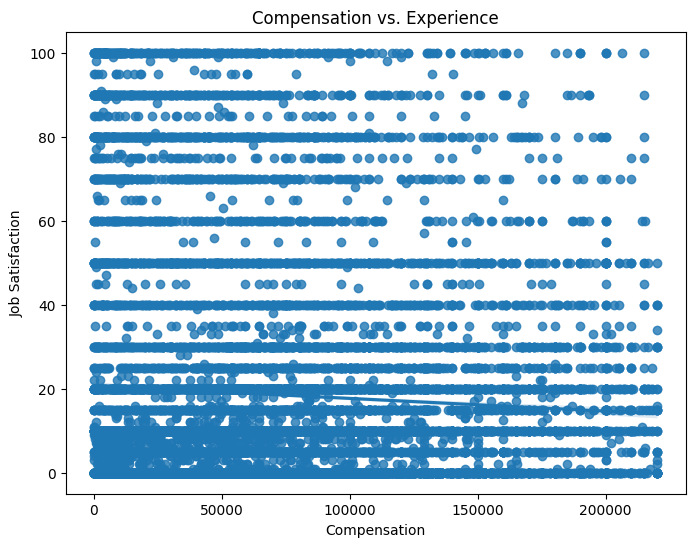

In [69]:
plt.figure(figsize=(8, 6)) # Optional: adjust figure size
sns.regplot(x='ConvertedCompYearly', y='JobSatPoints_1', data=df5)
#sns.regplot(x='ConvertedCompYearly', y='JobSat', data=df5)
plt.title('Compensation vs. Experience')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
